# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [85]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1

#### The data we will use in this challenge is:

In [86]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [87]:
%matplotlib inline

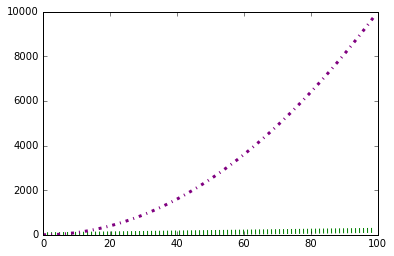

In [88]:
# Method 1
plt.plot(x, y, color="green", lw=5, ls=':')
plt.plot(x, z, color="purple", lw=3, ls='-.')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

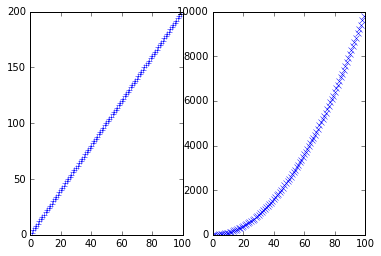

In [89]:
# Method 2
fig, axes=plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, y, '+')
axes[1].plot(x, z, 'x')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'score')

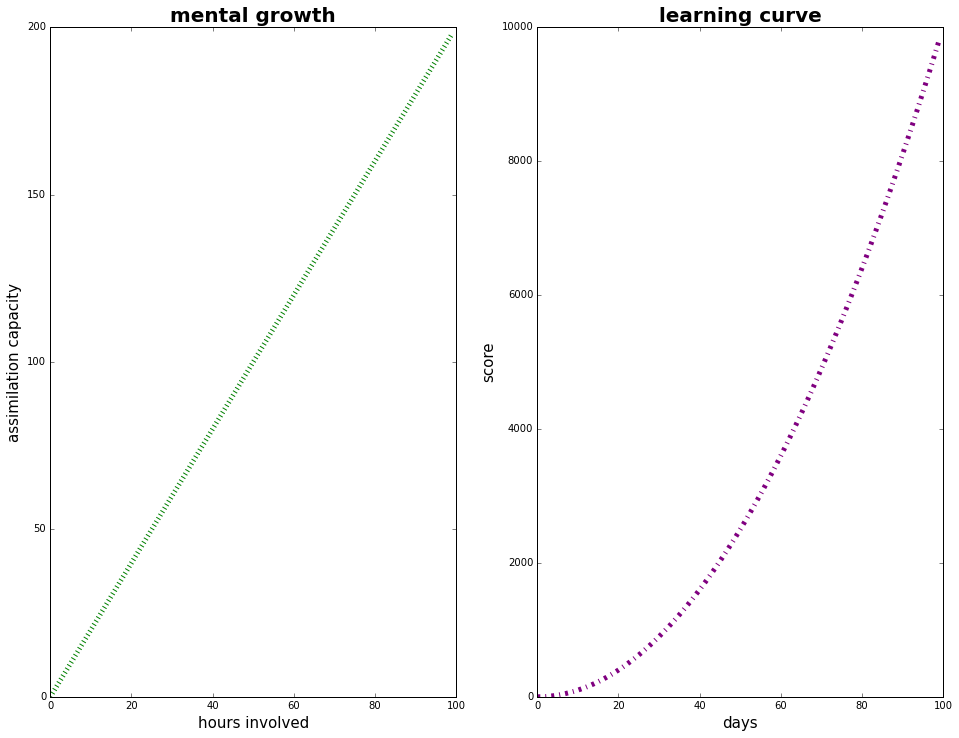

In [90]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(16, 12))

axes[0].plot(x, y, color="green", lw=5, ls=':')
axes[0].set_title('mental growth', fontsize=20, fontweight='bold')
axes[0].set_xlabel('hours involved', fontsize=15)
axes[0].set_ylabel('assimilation capacity', fontsize=15)

axes[1].plot(x, z, color="purple", lw=5, ls='-.')
axes[1].set_title('learning curve', fontsize=20, fontweight='bold')
axes[1].set_xlabel('days', fontsize=15)
axes[1].set_ylabel('score', fontsize=15)

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

Text(0.5, 1.0, 'logarithmic scale')

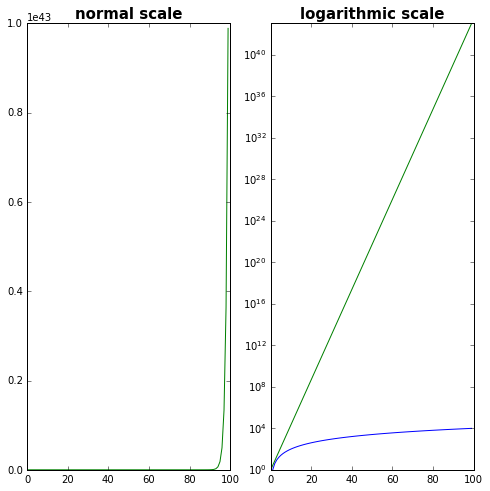

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title('normal scale', fontsize=15, fontweight='bold')

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale('log')
axes[1].set_title('logarithmic scale', fontsize=15, fontweight='bold')

#### As a bonus challenge, try to add a legend to the plot.

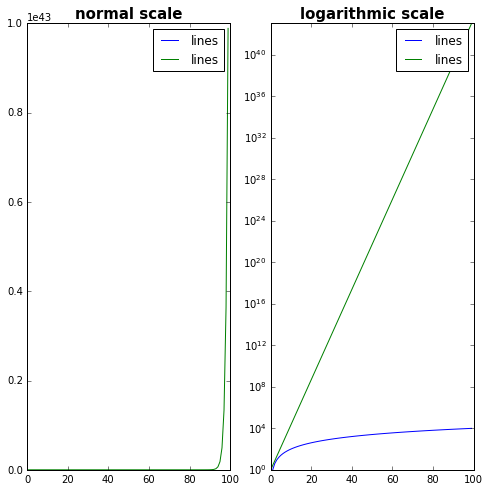

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

axes[0].plot(x, x**2, x, np.exp(x), label='lines')
axes[0].set_title('normal scale', fontsize=15, fontweight='bold')
axes[0].legend()

axes[1].plot(x, x**2, x, np.exp(x), label='lines')
axes[1].set_yscale('log')
axes[1].set_title('logarithmic scale', fontsize=15, fontweight='bold')
axes[1].legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [93]:
import pandas as pd

In [94]:
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

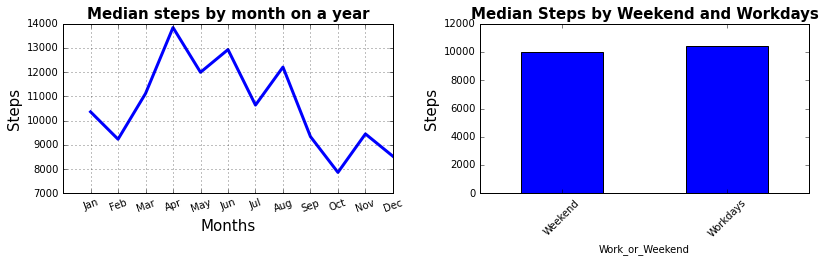

In [95]:
# MEDIAN STEPS BY MONTH_ENCODED
median_encoded = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plt.sca(axes[0])
median_encoded.plot(kind='line', linewidth=3)
plt.title('Median steps by month on a year', fontsize=15, fontweight='bold')
plt.xlabel('Months', fontsize=15)
plt.xticks(list(range(13)),
           ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=20)
plt.ylabel('Steps', fontsize=15)
plt.grid(True)

# MEDIAN STEPS BY WORK_OR_WEEKEND
plt.sca(axes[1])
median_workorweekend = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median().sort_values()
median_workorweekend.plot(kind='bar')
plt.title('Median Steps by Weekend and Workdays', fontsize=15, fontweight='bold')
plt.xticks(list(range(2)),
           ['Weekend','Workdays'],
          rotation=45)
plt.ylabel('Steps', fontsize=15)

plt.tight_layout(pad=2.0)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [96]:
cols=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
scatter_df=fitbit[cols]
scatter_df

,Minutes Lightly Active,Minutes Very Active,Minutes Sedentary,Steps
0,46,0,1.355,905
1,316,60,611.000,18925
2,226,77,602.000,14228
3,190,4,749.000,6756
4,171,0,876.000,502
...,...,...,...,...
362,275,79,599.000,18588
363,333,55,684.000,16382
364,287,90,701.000,21913
365,298,85,575.000,19023


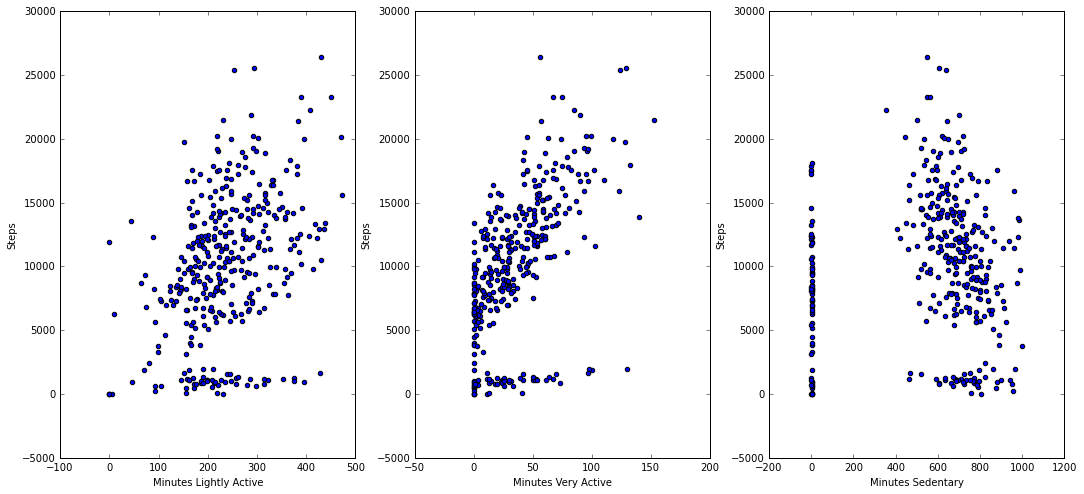

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
for x in range(3):
    plt.sca(axes[x])
    plt.scatter(scatter_df.iloc[:,x], scatter_df['Steps'])
    plt.xlabel(scatter_df.iloc[:,x].name)
    plt.ylabel('Steps')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [102]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [103]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [104]:
# NUMERICAL VARIABLES
num_var = titanic.select_dtypes(exclude=object)
num_var.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [105]:
# CATEGORICAL VARIABLES
cat_var = titanic.select_dtypes(exclude=['float','int'])
cat_var.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [106]:
import matplotlib.style

In [107]:
for style in plt.style.available:
    print(style)

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


In [108]:
plt.style.use('classic')

In [109]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

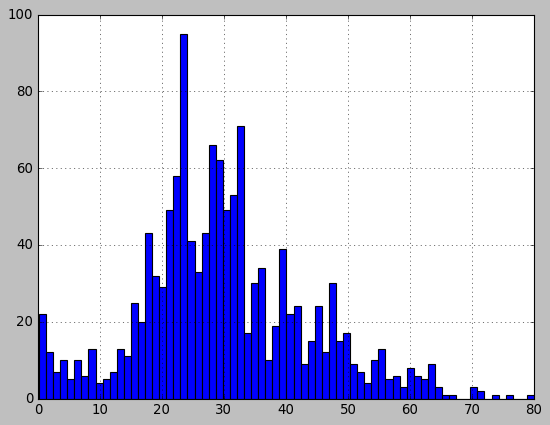

In [110]:
titanic['Age'].hist(bins=70)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

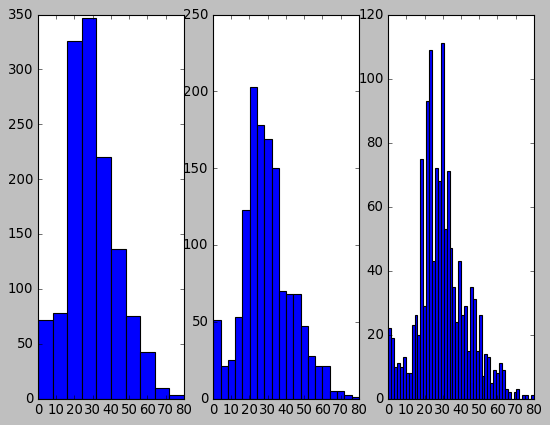

In [111]:
fig, axes = plt.subplots(ncols=3, nrows=1)
axes[0].hist(titanic['Age'], bins=10)
axes[1].hist(titanic['Age'], bins=20)
axes[2].hist(titanic['Age'], bins=50)

#### How does the bin size affect your plot?

In [112]:
"""
Bins sizes affects the ability to identify the data. Too larger cannot get enough differentiation and too small the data cannot be grouped
"""

'\nBins sizes affects the ability to identify the data. Too larger cannot get enough differentiation and too small the data cannot be grouped\n'

#### Use seaborn to show the distribution of column `Age`.

In [113]:
import seaborn as sns

Text(0.5, 1.0, 'Age distribution')

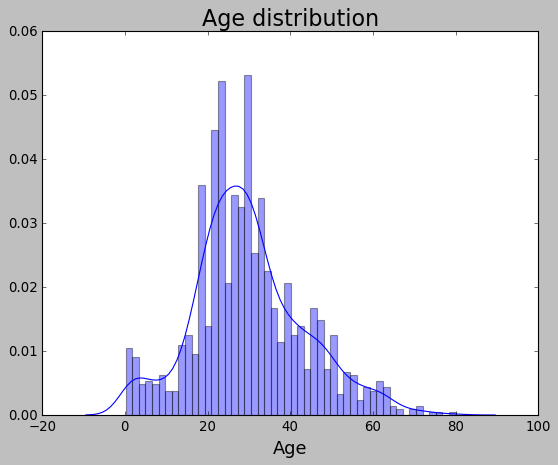

In [114]:
sns.distplot(titanic['Age'], bins=50)
plt.xlabel("Age", size=16)
plt.title("Age distribution", size=20)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Count')

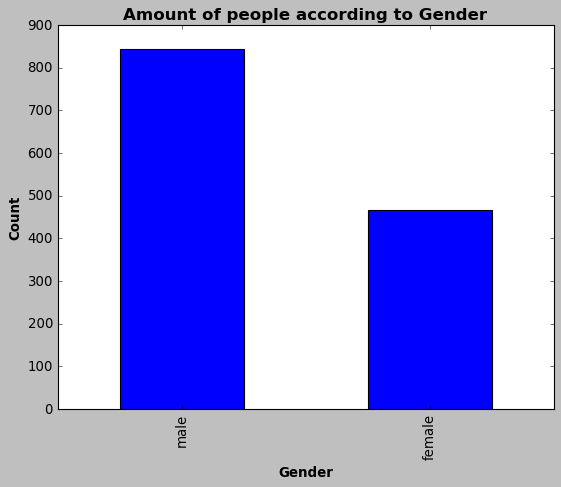

In [115]:
# Method 1 - matplotlib
titanic['Gender'].value_counts().plot.bar()
plt.title('Amount of people according to Gender', fontsize=15, fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

Text(0.5, 1.0, 'Amount of people according to Gender')

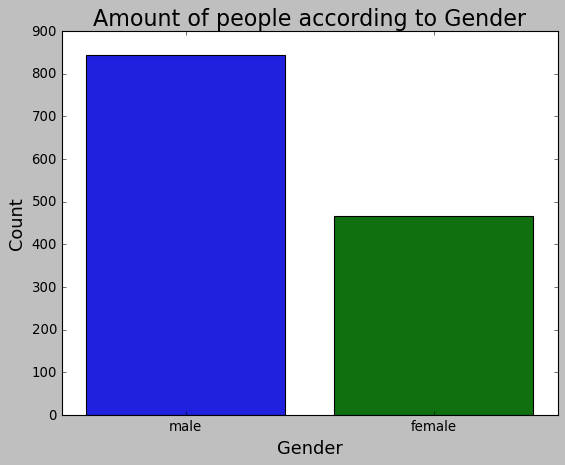

In [116]:
# Method 2 - seaborn
sns.countplot(x='Gender', data=titanic)
plt.xlabel("Gender", size=16)
plt.ylabel("Count", size=16)
plt.title("Amount of people according to Gender", size=20)

#### Use the right plot to visualize the column `Pclass`.

Text(0, 0.5, 'Class')

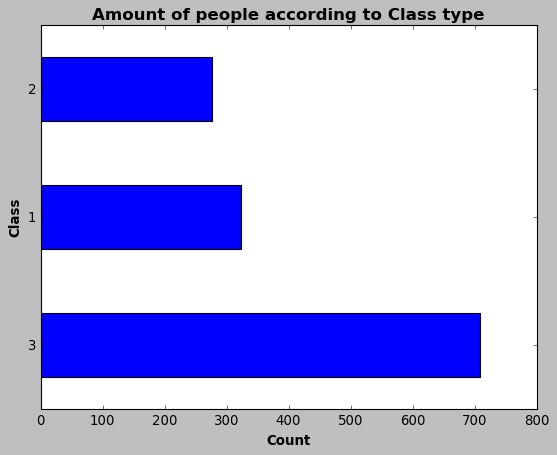

In [117]:
titanic['Pclass'].value_counts().plot(kind='barh')
plt.title('Amount of people according to Class type', fontsize=15, fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Class', fontweight='bold')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

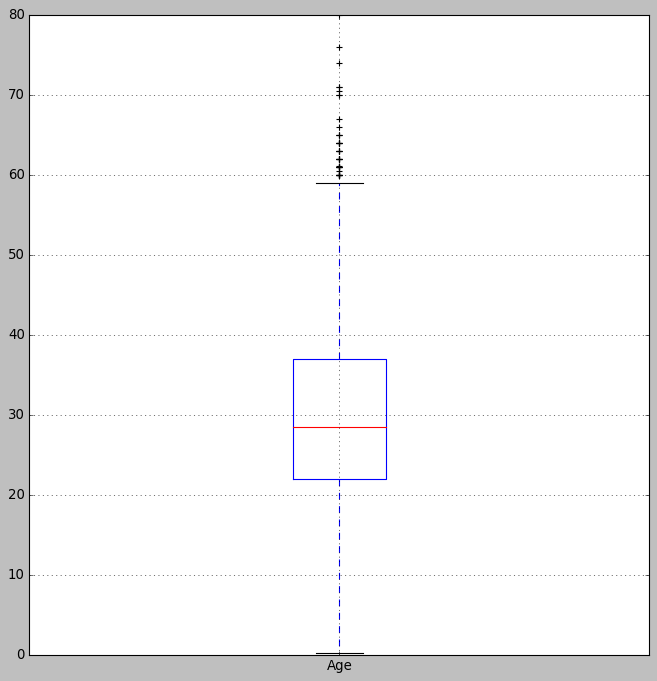

In [118]:
titanic.boxplot(column='Age', figsize=(10,10))

In [119]:
"""
Boxplots are a standardized way of displaying the distribution of data based on a five number summary:
- minimum 
- first quartile (Q1) 
- median 
- third quartile (Q3) 
- maximum
"""

'\nBoxplots are a standardized way of displaying the distribution of data based on a five number summary:\n- minimum \n- first quartile (Q1) \n- median \n- third quartile (Q3) \n- maximum\n'

#### What does the last plot tell you about the feature `Age`?

In [120]:
"""
The last graph perfectly represents the average age is below 30, finding the most representative values between 20 and 40 years of age. The age limit is between 1 and 80 years
"""

'\nThe last graph perfectly represents the average age is below 30, finding the most representative values between 20 and 40 years of age. The age limit is between 1 and 80 years\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

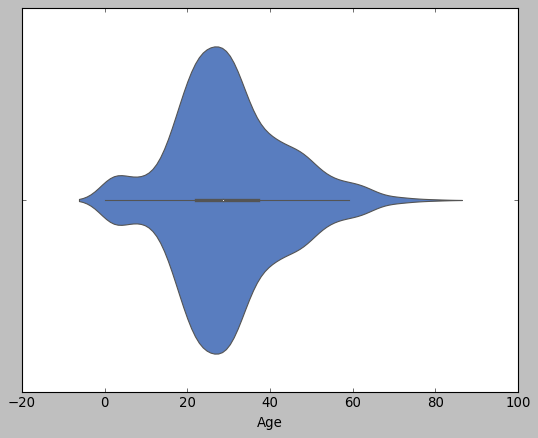

In [121]:
sns.violinplot(x=titanic['Age'], palette='muted')

#### What additional information does the last plot provide about feature `Age`?

In [122]:
"""
The density of the region represents the majority of values. It shows the distribution of quantitative data across several levels of one categorical variable such that those distributions can be compared.
"""

'\nThe density of the region represents the majority of values. It shows the distribution of quantitative data across several levels of one categorical variable such that those distributions can be compared.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Age')

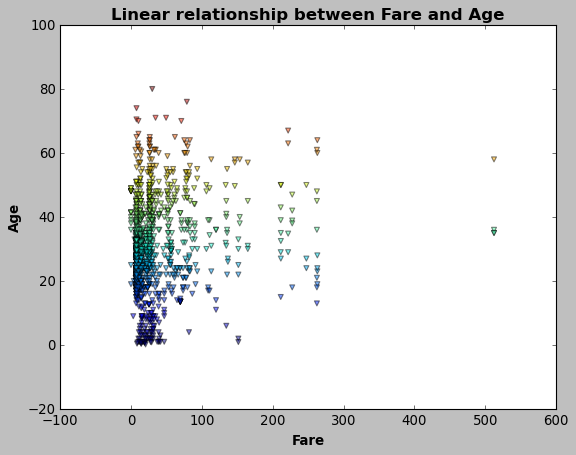

In [123]:
# Method 1 - matplotlib
plt.scatter(x='Fare', y='Age', data=titanic, c='Age', marker='v', alpha=0.5)
plt.title('Linear relationship between Fare and Age', fontsize=15, fontweight='bold')
plt.xlabel('Fare', fontweight='bold')
plt.ylabel('Age', fontweight='bold')

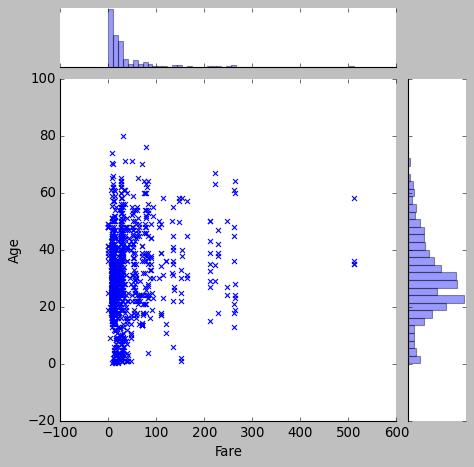

In [124]:
# Method 2 - seaborn
sns.jointplot(x='Fare', y='Age', data=titanic, marker='x')

#### Plot the correlation matrix using seaborn.

Text(0.5, 1.0, 'Correlation matrix')

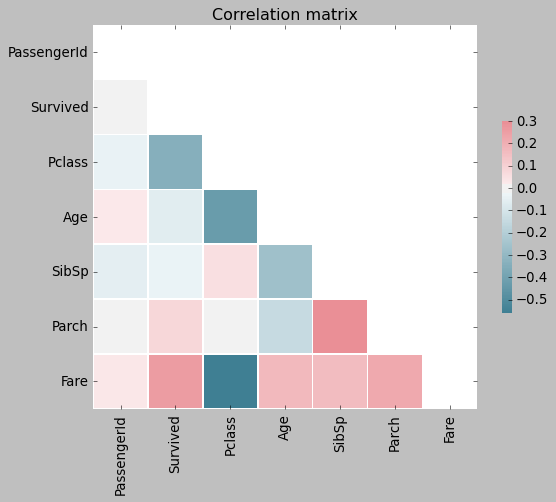

In [129]:
sns.heatmap(titanic.corr(), 
            mask=np.triu(np.ones_like(titanic.corr(), dtype=np.bool)), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})
plt.title('Correlation matrix')

#### What are the most correlated features?

In [130]:
"""
This chart allows to quickly observe the relationship between every variable of the matrix. Correlation coefficients whose magnitude are between 0.1 and 0.3 indicate variables which can be considered highly correlated.
"""

'\nThis chart allows to quickly observe the relationship between every variable of the matrix. Correlation coefficients whose magnitude are between 0.1 and 0.3 indicate variables which can be considered highly correlated.\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

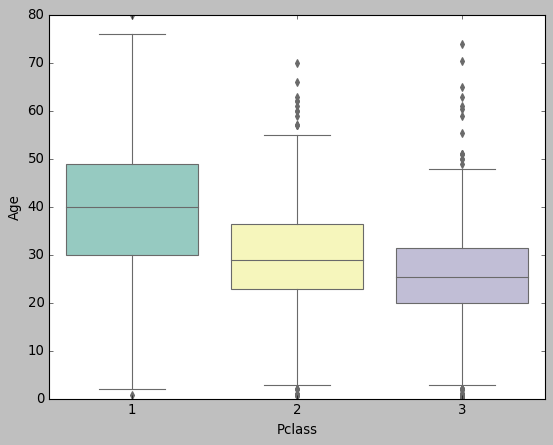

In [140]:
sns.boxplot(x='Pclass', 
            y='Age', 
            data=titanic, 
            palette='Set3')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

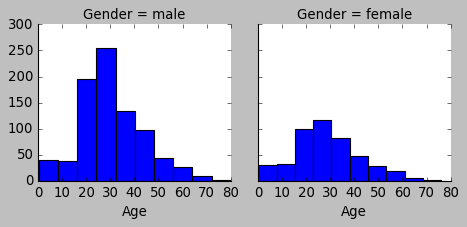

In [142]:
sns.FacetGrid(data=titanic,col='Gender').map(plt.hist,'Age')